   age
0   60
1   43
2   67
3   50
4   56


<AxesSubplot:>

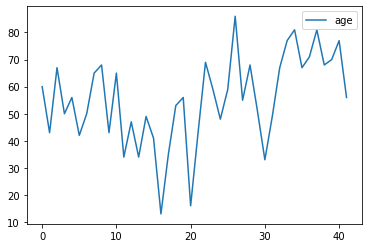

In [1]:
import pandas as pd 

df=pd.read_csv('c:/data/time/kings.dat',header=None,names=['age'])
print(df.head())
df.plot()

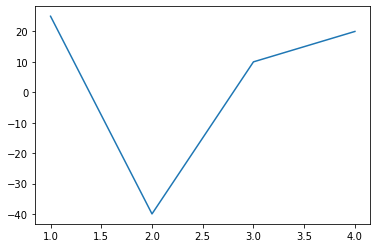

In [2]:
import matplotlib.pyplot as plt
a=pd.Series([1025,1050,1010,1020,1040])
b=a.diff(periods=1).iloc[1:]
plt.plot(b)

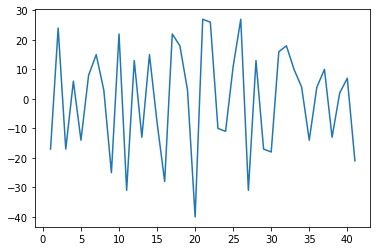

In [3]:
diff1=df['age'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1=np.log(df['age']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print(result[0])
print(result[1])

(-7.446856429613952, 5.807660899733621e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.20496009678498)
-7.446856429613952
5.807660899733621e-11


In [5]:
from pmdarima.arima import auto_arima
model=auto_arima(df)
model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
train=df[:30]
test=df[30:]


In [15]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(0,1,1)).fit()

In [8]:
fore=model.forecast(steps=5)
print(fore)

(array([59.52326706, 59.7174093 , 59.91155154, 60.10569379, 60.29983603]), array([15.67413926, 16.19266133, 16.69508672, 17.18282747, 17.65710054]), array([[28.80251862, 90.24401549],
       [27.98037628, 91.45444232],
       [27.18978286, 92.63332023],
       [26.42797079, 93.78341679],
       [25.6925549 , 94.90711716]]))


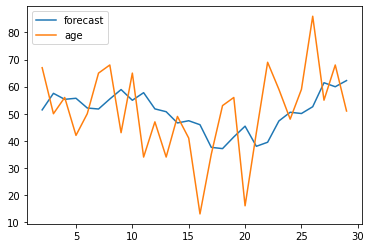

In [9]:
model.plot_predict()
plt.show()

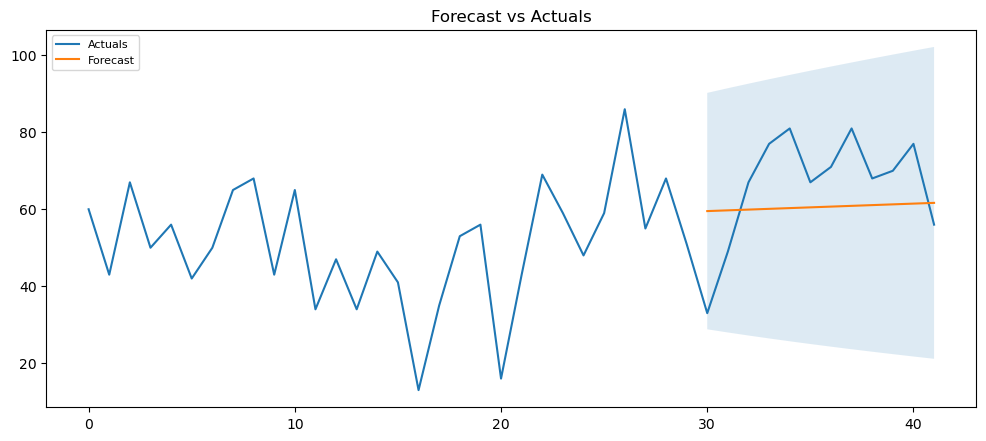

In [17]:
fc,se,conf=model.forecast(steps=len(test))
fc_series=pd.Series(fc,index=test.index)
lower=pd.Series(conf[:,0],index=test.index)
upper=pd.Series(conf[:,1],index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()